In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1) QR Decomposition

In [242]:
#Create matrix
m,n = 50,50
A = np.random.rand(m,n)

In [231]:
#Define a function to check work (Just for my use debugging)
def checkQR(A,Q,R):  
    #Calculate norms and inner products of Q columns
    normal,orthogonal=[],[]
    for i in range(m):
        normal.append(np.linalg.norm(Q[:,i])) #Q is normal if norm = 1
        for j in range(i+1,m):
            orthogonal.append(Q[:,j].T @ Q[:,i]) #Orthogonal if inner product of each column is 0
    
    #Is Q normal?
    if np.all(np.round(normal,10)==1):
        print('Q is normal')
    else: 
        print('Q is not normal')
        
    #Is Q orthogonal?
    if np.all(np.round(orthogonal,10) == 0): 
        print('Q is orthogonal')
    else:
        print('Q is not orthogonal')
    
    #Does A = QR?
    if np.allclose(Q @ R , A):
        print('A = QR')
    else:
        print('A != QR')

In [246]:
#QR decomposition via Modified Gram Schmidt (MGS)
def MGS(A):
    m,n = A.shape
    Q=np.eye(m,n) #initialize Q matrix
    R=np.eye(m,n)
    X = A
    for j in range(n):
        vj = X[:,j]
        rjj=np.linalg.norm(vj)
        R[j,j]=rjj
        qj = vj / rjj
        Q[:,j] = qj #update Q matrix
        for k in range(j+1,n):
            vk = X[:,k]
            rjk=qj.T@vk
            R[j,k]=rjk
            vk = vk - rjk * qj
            X[:,k] = vk
    Q=Q.T
    R = -R
    
    return Q, R

Q,R = MGS(A)

#check error
print('Modified Gram Schmidt: \nnorm(A-QR) =',np.linalg.norm(A-Q@R))

R

Modified Gram Schmidt: 
norm(A-QR) = 16.1085143117375


array([[-3.86337453e+00,  5.55111512e-17, -5.55111512e-17, ...,
        -2.77555756e-17,  2.60208521e-18,  1.04083409e-17],
       [-0.00000000e+00, -2.77284049e+00,  5.55111512e-17, ...,
         1.90819582e-17, -5.20417043e-18, -3.46944695e-18],
       [-0.00000000e+00, -0.00000000e+00, -2.19394818e+00, ...,
         3.46944695e-18, -5.20417043e-18, -6.93889390e-18],
       ...,
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -5.27673241e-01, -5.20417043e-18, -4.85722573e-17],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -1.33993917e-01, -5.55111512e-17],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -6.45086892e-01]])

In [238]:
def householderQR(A1): #adapted for python from the qrfactor.m matlab code on website
    # [m,n] = size(A);
    # Q=eye(m);
    X = A1.copy()
    m,n = A1.shape
    Q = np.eye(m)

 
    # for k = 1:n
    #     % Find the HH reflector
    #     z = A(k:m,k);
    #     v = [ -sign(z(1))*norm(z) - z(1); -z(2:end) ];
    #     v = v / sqrt(v'*v);   % remove v'*v in den
    for k in range(n):
        z = X[k:m,k]
        v = np.insert(-z[1:],0,-np.sign(z[0])*np.linalg.norm(z) - z[0])
        v = v / np.sqrt(v.T @ v)

    #     % Apply the HH reflection to each column of A and Q
    #     for j = 1:n
    #         A(k:m,j) = A(k:m,j) - v*( 2*(v'*A(k:m,j)) );
    #     end

        for j in range(n):
            X[k:m,j] = X[k:m,j] - v*(2*v.T @ X[k:m,j])

    #     for j = 1:m
    #         Q(k:m,j) = Q(k:m,j) - v*( 2*(v'*Q(k:m,j)) );
    #     end
        for j in range(m):
            Q[k:m,j] = Q[k:m,j] - v*(2*v.T @ Q[k:m,j])    
    # end

    # Q = Q';
    Q = Q.T
    # R = triu(A);  % exact triangularity
    R = np.triu(A)
    
    return Q, R

Q,R = householderQR(A)

#check error
print('Householder method (adapted from qrfactor.m): \nnorm(A-QR) =',np.linalg.norm(A-Q@R))

Householder method (adapted from qrfactor.m): 
norm(A-QR) = 13.795023371888176


In [247]:
#Built in numpy QR solver function:
Q, R = np.linalg.qr(A)

#check error
print('Built in numpy QR solver: \nnorm(A-QR) =',np.linalg.norm(A-Q@R))

R

Built in numpy QR solver: 
norm(A-QR) = 4.588368825003289e-15


array([[-3.86337453e+00,  0.00000000e+00, -3.46944695e-17, ...,
         4.25007252e-17,  1.04083409e-17,  2.77555756e-17],
       [ 0.00000000e+00,  2.77284049e+00,  4.16333634e-17, ...,
         0.00000000e+00,  5.20417043e-18,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.19394818e+00, ...,
         2.08166817e-17,  0.00000000e+00, -3.46944695e-18],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.27673241e-01,  2.08166817e-17, -1.11022302e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.33993917e-01,  1.11022302e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -6.45086892e-01]])

# Problem 2)

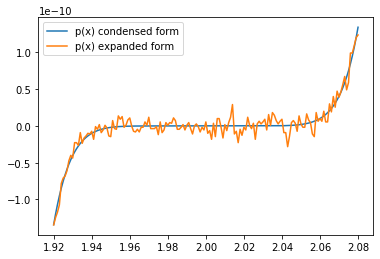

In [3]:
def p1(x):
    return (x-2)**9
def p2(x):
    return x**9 - 18*x**8 + 144*x**7 -672*x**6 + 2016*x**5 - 4032*x**4 + 5376*x**3 - 4608*x**2 + 2304*x - 512

x=np.arange(1.920,2.080,0.001)
plt.plot(x,p1(x),label='p(x) condensed form')
plt.plot(x,p2(x),label='p(x) expanded form')
plt.legend()
plt.show()

# Problem 3)

In [240]:
# Part a)
# A is an m by n matrix, where m > n. Study the condition number as m & n increase.
m=[20,400,1000,2000,5000]
n=[10,200,600,1250,2500]

for i in range(len(m)):
    A = np.random.rand(m[i],n[i])
    K = np.linalg.cond(A)
    print('m = {}, n = {}, K = {}'.format(m[i],n[i],K))

print('Conditioning number increases as the matrix size increases.')

m = 20, n = 10, K = 13.674040139722619
m = 400, n = 200, K = 82.05693568090162
m = 1000, n = 600, K = 188.80767766995373
m = 2000, n = 1250, K = 285.90102284086606
m = 5000, n = 2500, K = 295.7537282259971
Conditioning number increases as the matrix size increases.


In [27]:
# Part b)
m=40
n=20
A = np.random.rand(m,n)
A = np.concatenate((A,A[:,0].reshape(-1,1)),axis=1)
print('Condition number =', np.linalg.cond(A))
print('Determinant =', np.linalg.det(A[:n+1,:n+1])) #This is what Prof. Kutz told us to do in class, even though it's not what the assignment says.

Condition number = 3.2444609025932612e+16
Determinant = 5.737960033590644e-19


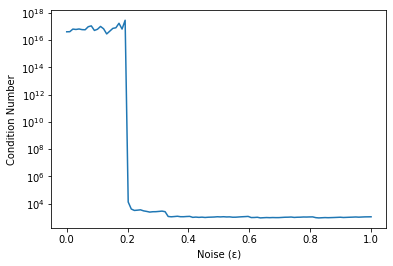

In [67]:
#Part c)
#add noise then calculate condition number
(m,n) = (40,20)
A = np.random.rand(m,n)
a = A[:,0].reshape(-1,1) #first col of A

x = np.linspace(0,1,100)
K=[]
for epsilon in x:
    a = a + epsilon*np.random.rand(A.shape[0],1)
    A = np.concatenate((A,a),axis=1)
    K.append(np.linalg.cond(A))

plt.plot(x,K)
plt.ylabel('Condition Number')
plt.xlabel('Noise (\u03B5)')
plt.yscale('log')
plt.show()